In [91]:
def load_json(filename):
    '''
    Load the given .json files for STAT-628-Module-3
    '''
    res = []
    with open(filename, 'r', encoding='utf-8') as f:
        try:
            while True:
                line = f.readline()
                if line:
                    res.append(json.loads(line))
                else:
                    break
        except:
            f.close()
    res = pd.DataFrame.from_dict(res)
    return res

In [92]:
import json
import pandas as pd
import copy

In [93]:
business = load_json('business.json')

In [94]:
business

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,None,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
8,5940 W Union Hills Dr,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",Y6iyemLX_oylRpnr38vgMA,"Nail Salons, Beauty & Spas, Day Spas",Glendale,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",0,33.654815,-112.188568,Vita Bella Fine Day Spa,85308,8,5.0,AZ
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH


In [95]:
business['categories'].value_counts()[0:25]

Restaurants, Pizza                           1042
Nail Salons, Beauty & Spas                   1031
Pizza, Restaurants                            993
Beauty & Spas, Nail Salons                    947
Food, Coffee & Tea                            888
Mexican, Restaurants                          885
Coffee & Tea, Food                            865
Restaurants, Mexican                          853
Chinese, Restaurants                          840
Hair Salons, Beauty & Spas                    831
Beauty & Spas, Hair Salons                    819
Restaurants, Chinese                          789
Automotive, Auto Repair                       585
Auto Repair, Automotive                       534
Food, Grocery                                 492
Grocery, Food                                 491
Restaurants, Italian                          474
Italian, Restaurants                          446
Banks & Credit Unions, Financial Services     439
Financial Services, Banks & Credit Unions     401


In [96]:
Mexican_shop = business.loc[(business['categories'] == 'Mexican, Restaurants') | (business['categories'] == 'Restaurants, Mexican') , :]
Mexican_shop

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
146,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,85286,84,4.0,AZ
276,1930 W Buckeye Rd,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",c7JoAt6a3Ufkpn3TrGU23A,"Mexican, Restaurants",Phoenix,None,1,33.436984,-112.101267,Santanas Mexican Food,85009,6,3.0,AZ
285,971 O'Connor Drive,"{'RestaurantsGoodForGroups': 'True', 'Ambience...",AXq8uPxqBP-c5PCrnba-4A,"Mexican, Restaurants",Toronto,"{'Monday': '15:0-21:0', 'Tuesday': '11:0-21:0'...",1,43.708355,-79.310127,Mexico Lindo,M4K 1T1,6,4.5,ON
483,7106 Brighton Park Dr,"{'RestaurantsDelivery': 'False', 'NoiseLevel':...",HqerocZHKSRFD8NTrIkbaw,"Restaurants, Mexican",Mint Hill,None,1,35.172354,-80.661499,Taxco Mexican Grill,28227,52,3.0,NC
536,2500 N 35th Ave,"{'HasTV': 'True', 'RestaurantsReservations': '...",rwscnQMpddjkVNaJQhNuHw,"Mexican, Restaurants",Phoenix,None,1,33.475353,-112.134871,Birrieria Obregon,85009,24,4.0,AZ
779,2101 Texas Star Ln,"{'NoiseLevel': 'u'loud'', 'OutdoorSeating': 'F...",9ttdN9MIS1j9c8Hp5TmZnw,"Restaurants, Mexican",North Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",0,36.197796,-115.191855,Baja Fresh,89032,7,3.0,NV
861,930 Nevada Hwy,"{'RestaurantsReservations': 'True', 'BikeParki...",cMK38jKxH8x5PvFfAfjZmA,"Mexican, Restaurants",Boulder City,"{'Monday': '16:0-21:0', 'Wednesday': '16:0-21:...",0,35.974545,-114.843346,Casa Flores Restaurant,89005,63,3.0,NV
1398,20221 N 67th Ave,"{'GoodForKids': 'True', 'BusinessParking': '{'...",FiG8PzWKRYehtPPcPtOStw,"Mexican, Restaurants",Glendale,None,0,33.670048,-112.200473,Salsa Blanca,85308,139,4.0,AZ
1524,2300 A West Roosevelt Blvd,"{'RestaurantsReservations': 'False', 'Business...",4k9Xo2jDgotOYITop5TqTA,"Mexican, Restaurants",Monroe,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-10:15...",1,35.009885,-80.562151,Carnitas Guanajuato,28110,10,4.0,NC
1539,8517 Rue Hochelaga,"{'RestaurantsGoodForGroups': 'False', 'Restaur...",rjUuCbH7q-bSw5iWMwMHhQ,"Mexican, Restaurants",Montréal,"{'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0...",1,45.599332,-73.521315,Nopales,H1L 2M1,5,3.5,QC


In [97]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [98]:
Mexican_shop["city"].value_counts()[0:10]

Phoenix       306
Las Vegas     270
Toronto       109
Mesa           91
Charlotte      69
Tempe          58
Montréal       51
Glendale       47
Pittsburgh     46
Scottsdale     45
Name: city, dtype: int64

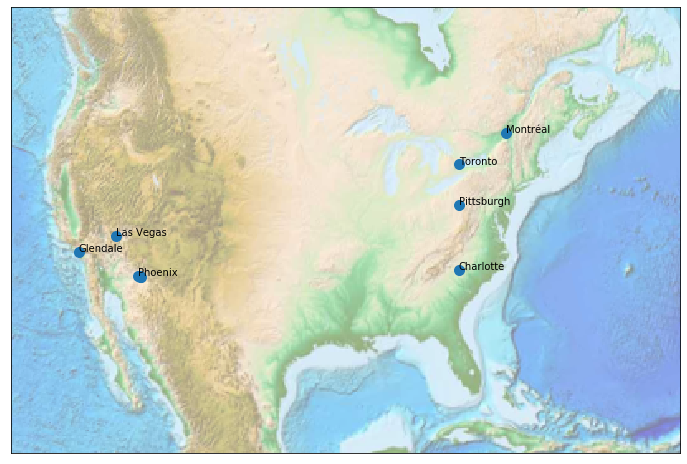

In [99]:
fig = plt.figure(figsize=(12, 10))
m = Basemap(projection='lcc', resolution=None,
width=6E6, height=4E6,
lat_0=39, lon_0=-92,)
m.etopo(scale=0.5, alpha=0.5)

lon=[-115.139832,-79.383186,-112.074036,-80.843124,-73.567253,-79.995888,-118.255074,-111.926048,-111.831474,-111.941254]
lat=[36.169941,43.653225,33.448376,35.227085,45.501690,40.440624,34.142509,33.494171,33.415184,33.425522]
city=['Las Vegas','Toronto','Phoenix','Charlotte','Montréal','Pittsburgh','Glendale']
lon,lat=m(lon,lat)
m.scatter(lon, lat, s=100)
for i in range(0,7):
    plt.text(lon[i], lat[i],city[i], fontsize=10)
plt.savefig('location.png',dpi=300)




In [100]:
Canada=Mexican_shop[(Mexican_shop['city']=='Toronto') | (Mexican_shop['city']=='Montréal')]
US=Mexican_shop[(Mexican_shop['city']=='Las Vegas') | (Mexican_shop['city']=='Phoenix') | (Mexican_shop['city']=='Charlotte') | (Mexican_shop['city']=='Pittsburgh')
               | (Mexican_shop['city']=='Glendale') | (Mexican_shop['city']=='Mesa') | (Mexican_shop['city']=='Tempe') | (Mexican_shop['city']=='Scottsdale')]

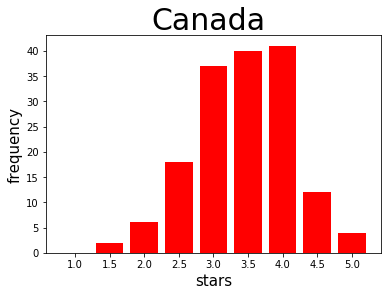

In [101]:
stars=[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
counts_Can=[0,2,6,18,37,40,41,12,4]
counts_US=[3,7,39,85,206,222,241,116,13]
plt.bar(range(len(counts_Can)), counts_Can , color='r',tick_label=stars)
plt.suptitle('Canada',fontsize=30)
plt.xlabel("stars",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.show()

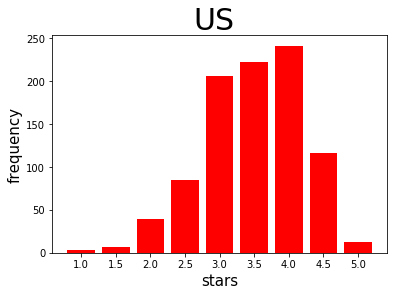

In [102]:
plt.bar(range(len(counts_Can)), counts_US , color='r',tick_label=stars)
plt.suptitle('US',fontsize=30)
plt.xlabel("stars",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.show()

In [103]:
West=Mexican_shop[(Mexican_shop['city']=='Las Vegas') | (Mexican_shop['city']=='Glendale') | (Mexican_shop['city']=='Tempe')
                  | (Mexican_shop['city']=='Mesa') | (Mexican_shop['city']=='Phoenix') | (Mexican_shop['city']=='Scottsdale')]
East=Mexican_shop[(Mexican_shop['city']=='Pittsburgh') | (Mexican_shop['city']=='Charlotte')]
West['stars'].value_counts()


4.0    210
3.5    187
3.0    182
4.5    104
2.5     75
2.0     36
5.0     13
1.5      7
1.0      3
Name: stars, dtype: int64

In [104]:
East['stars'].value_counts()

3.5    35
4.0    31
3.0    24
4.5    12
2.5    10
2.0     3
Name: stars, dtype: int64

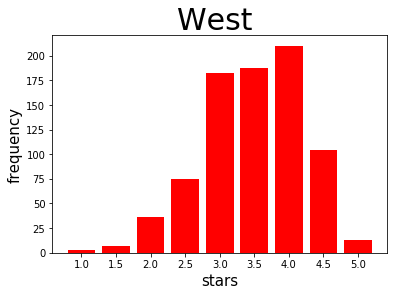

In [105]:
counts_East=[0,0,3,10,24,35,31,12,0]
counts_West=[3,7,36,75,182,187,210,104,13]
plt.bar(range(len(counts_Can)), counts_West , color='r',tick_label=stars)
plt.suptitle('West',fontsize=30)
plt.xlabel("stars",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.show()

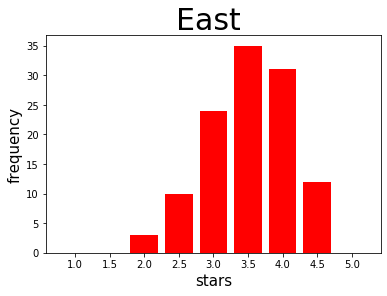

In [106]:
plt.bar(range(len(counts_Can)), counts_East , color='r',tick_label=stars)
plt.suptitle('East',fontsize=30)
plt.xlabel("stars",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.show()

In [107]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [108]:
review = load_json('review.json')


In [109]:
Mexican_review = review.loc[review["business_id"].isin(Mexican_shop["business_id"]),:]

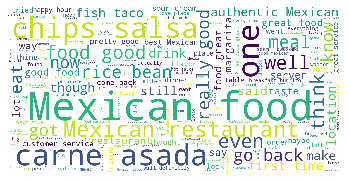

In [110]:
text=Mexican_review['text'].values
text_1 = "".join(str(e) for e in text)
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, random_state=30, scale=3)
wordcloud.generate_from_text(text_1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [111]:
def distribution(list1, list2, list3):
    data=[]
    stars_category=[1.0,2.0,3.0,4.0,5.0]
    for i in list1:
        index=0
        stars=[]
        for j in list2:
            if i in j :
                stars.append(list3[index])
            index += 1
        data.append(stars)
    for k in range(len(list1)):
        counts=[]
        for l in stars_category:
            counts.append(data[k].count(l))
        plt.bar(range(len(counts)), counts , color=['r','g','b', 'c', 'm'],tick_label=stars_category)
        plt.suptitle(list1[k],fontsize=30)
        plt.xlabel("stars",fontsize=15)
        plt.ylabel("frequency",fontsize=15)
        plt.show()
                
            
    

In [112]:
result = pd.merge(Mexican_shop,Mexican_review,how = "outer",on = "business_id")

In [113]:
result

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id
0,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2013-12-28 20:59:06,0,2rHmbiB9EHVK62A3ZOsqqA,5.0,We eat here pretty much weekly. My husband was...,0,JiOGGJP2v6E0m2ewBSPbwQ
1,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2014-04-20 04:43:40,0,MRK4F-d9h7Z5qBLdcoKx-w,5.0,Perfection! Green chile sauce in pork stew bow...,0,H5hqPI4wBE48qAWW2U6ZrA
2,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2013-05-08 06:30:58,0,nSB22BgoRdbxQoHPhPb3gw,4.0,"My wife had the chicken salad and was pleased,...",0,xyJnoDO475qiPFaSMyQzNA
3,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2013-12-08 23:28:54,0,v3-8bgSDcoaEHJsTmOu7AA,4.0,Absolutely love this place! Their chicken burr...,0,SbhhvyAUpQKqXv4SFwZEnw
4,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2014-08-25 00:07:50,0,uLv_8O-fSWjyDqpcgncBvA,5.0,It's a little tough to find this place but I'm...,0,t6cvXZrt7M9kRWpOHgL5VA
5,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2014-06-29 19:58:58,0,4GKcylp5UFR9F4deIux3wg,5.0,Love this place! It seems I find myself there ...,0,e8ORmvimQXOGW7Lnb6M2mQ
6,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2013-09-06 02:02:18,0,apJPYZSmueYfo5hCFtah5g,4.0,I have had the opportunity to eat here three t...,0,R_jpPFRkjvKe3jq4Yo2L_w
7,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2014-09-27 17:44:01,0,v-nkAOhh1ZHpndzSm-He0Q,4.0,"I grew up in NM, and this place has some great...",2,Fi9YxOSkjns2FQUDmltNYg
8,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2013-05-11 01:52:22,0,mxgZpnDc4kw6vWhLwUqcmA,5.0,I love this place! Everything I've eaten here ...,0,WP7FsUsgNW24s7HH5xi7pg
9,"3140 S Gilbert Rd, Ste 3","{'GoodForKids': 'True', 'RestaurantsReservatio...",voZnDQs6Hs3YpNcS-9TALg,"Restaurants, Mexican",Chandler,None,0,33.261325,-111.790815,New Mexican Grill,...,4.0,AZ,0,2014-06-13 20:47:48,0,2HYbdHNyJXitYMQoLGEctw,4.0,Service is slow even when there is no one In t...,0,amoIsJTOKAKPvyPRr3Rv3g


In [114]:
Phoenix=result[result['city']=='Phoenix']

In [115]:
import folium

In [116]:
pip install folium.plugins

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement folium.plugins (from versions: none)
ERROR: No matching distribution found for folium.plugins


In [117]:
import folium.plugins as plugins

In [118]:
data=[]
stars_list=list(Mexican_review['stars'].unique())
for star in stars_list:
    subset=Phoenix[Phoenix['stars_y']==star]
    data.append(subset[['latitude','longitude']].values.tolist())
#initialize at vegas
lat = 33.448376
lon = -112.074036
zoom_start=11
print("                     Phoenix Review heatmap Animation ")

# basic map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)
#inprovising the Heatmapwith time plugin to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=7)
hm.add_to(m)
m

                     Phoenix Review heatmap Animation 


In [119]:
Mexican_review

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
142,lVfZ2AaYRYHCFenUMQna8g,0,2015-10-07 20:52:28,2,kN7QMpXNT38NeeesQ6zYUQ,5.0,Oooh momma!\nThe flavor is strong with this on...,0,U6tZwpRVjUfx-fwDbMAlPA
208,fGnILhhgE393e-8X9JIB4Q,0,2018-02-23 23:15:39,0,KLlEXggpyLEfBYOhSbqtgg,4.0,We lived in Mexico for several years so are al...,1,gEqc7SFZEI_Z0eLRR0ouug
218,7rpa12_EX3A-hyGtrv8o3A,2,2011-10-27 13:17:18,0,qa0QwP9mvcN9Pml6a-5K1g,4.0,Great food in a homely Mexican setting. The to...,1,dtanlcid8_m1L49ZK1YPfw
258,7tdVsSDXRKtLLC-fD1hJ-A,0,2012-12-04 02:18:24,0,Vo2hMjZGM1-LYSBSgABTZA,4.0,I have visited this place several times. They ...,0,W0QVEiIElFQ9ulVrMp9_nA
291,vnIdWzIB2W4j9cDcd6tHAQ,0,2016-01-30 01:42:31,0,vxlhc4-5EUCtCk7OhiLDKw,5.0,Im obsessed with this place! Best dishes to tr...,0,KB_g3gK7D-WjzVLtpaSpQw
295,_6mvQX9x66oz046eS5ii8w,0,2017-09-20 14:49:17,0,BFM_flUW3wHOuGOmJt3DnQ,5.0,Chilaquiles is on point. I bought them last an...,1,8m9q7KT9Bgw6qMjHBMb4YA
350,cMK38jKxH8x5PvFfAfjZmA,0,2015-08-19 05:42:19,0,3jCD1kXmKIY-9ia-oReQhg,5.0,One of my favorite places to eat in town. They...,0,sezp3mgdB82MdBpQ2EumVg
366,SDdB_gFAWW23cNmtwT-dAA,2,2013-02-21 20:16:58,2,WiYGCOVvwNhq8QpUAPn39w,4.0,"One of my favorites for cheap, fast and tasty ...",2,VP0jOO0u-z0JIxZ52bQtJw
441,ViJGzET7fBMShhIgKew2Bg,0,2017-11-06 16:29:55,0,CmZzpN0GRvmuiQCN0YtBbQ,4.0,"Out shopping (gross), I got a hankering for Me...",0,HNrz6Xe7PoLjUp8kBUDykQ
458,5JxlZaqCnk1MnbgRirs40Q,0,2011-05-27 05:30:52,0,i6g_oA9Yf9Y31qt0wibXpw,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0,ofKDkJKXSKZXu5xJNGiiBQ


In [120]:
Phoenix

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id
86,1930 W Buckeye Rd,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",c7JoAt6a3Ufkpn3TrGU23A,"Mexican, Restaurants",Phoenix,None,1,33.436984,-112.101267,Santanas Mexican Food,...,3.0,AZ,0,2014-06-28 03:14:47,0,RY-RjLawlAxZpb7cSBSqFA,4.0,This place is a total dive but the staff is fr...,0,CyL4Nh9VHti5oIfcWevRIg
87,1930 W Buckeye Rd,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",c7JoAt6a3Ufkpn3TrGU23A,"Mexican, Restaurants",Phoenix,None,1,33.436984,-112.101267,Santanas Mexican Food,...,3.0,AZ,1,2013-02-05 20:19:16,0,LLDm4RZe6vwZjYg5R-iJTQ,4.0,I've been going to this place for years and ha...,1,etbQbMt6AleieHK8FG5Lqw
88,1930 W Buckeye Rd,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",c7JoAt6a3Ufkpn3TrGU23A,"Mexican, Restaurants",Phoenix,None,1,33.436984,-112.101267,Santanas Mexican Food,...,3.0,AZ,0,2015-09-21 02:15:02,0,6H0ZBuKQh_RzzU96qEc5mQ,3.0,I go here for tacos sometimes when I'm in the ...,0,tkj5cwIPLlJstisrVzpAZw
89,1930 W Buckeye Rd,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",c7JoAt6a3Ufkpn3TrGU23A,"Mexican, Restaurants",Phoenix,None,1,33.436984,-112.101267,Santanas Mexican Food,...,3.0,AZ,0,2012-12-03 14:16:28,0,QPdVp96mGrapQGz8VQvFcQ,1.0,Worst place to go to ever for anything. Long s...,0,fqP3GdlS0XDehRG2mZTcYQ
90,1930 W Buckeye Rd,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",c7JoAt6a3Ufkpn3TrGU23A,"Mexican, Restaurants",Phoenix,None,1,33.436984,-112.101267,Santanas Mexican Food,...,3.0,AZ,0,2018-11-08 17:32:06,0,iA7gz6U2R8Rdgc1oLNjUKg,5.0,Close to the 17 and easy to get to. Food is g...,0,nS-mMrrxAlwJkTu5v6fMcw
91,1930 W Buckeye Rd,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",c7JoAt6a3Ufkpn3TrGU23A,"Mexican, Restaurants",Phoenix,None,1,33.436984,-112.101267,Santanas Mexican Food,...,3.0,AZ,0,2018-06-26 05:13:37,0,nZb4BgZqhUUfTCDuXIMBHQ,1.0,This place could offer better service. The foo...,0,HXRScGn_h93AEGD14swuew
153,2500 N 35th Ave,"{'HasTV': 'True', 'RestaurantsReservations': '...",rwscnQMpddjkVNaJQhNuHw,"Mexican, Restaurants",Phoenix,None,1,33.475353,-112.134871,Birrieria Obregon,...,4.0,AZ,2,2014-05-08 18:34:15,0,bJwwbr5F81LP4MVmFKCnNQ,5.0,"The only bad thing about this place really, th...",2,spRWYzv7JiDJgEPCTdHZmA
154,2500 N 35th Ave,"{'HasTV': 'True', 'RestaurantsReservations': '...",rwscnQMpddjkVNaJQhNuHw,"Mexican, Restaurants",Phoenix,None,1,33.475353,-112.134871,Birrieria Obregon,...,4.0,AZ,1,2014-06-12 03:07:53,0,ZcfgHNnR4fqmJYXH0z_k7Q,4.0,Wow! Seriously good Biria Soup. It came with...,1,NSZK3vy4Q6LgITt6OU1ykw
155,2500 N 35th Ave,"{'HasTV': 'True', 'RestaurantsReservations': '...",rwscnQMpddjkVNaJQhNuHw,"Mexican, Restaurants",Phoenix,None,1,33.475353,-112.134871,Birrieria Obregon,...,4.0,AZ,0,2018-07-18 19:40:15,0,i7iPvSiXfC7jwehmPtMTqw,5.0,"Proportions were huge huge, The goat meat was ...",0,gPoqbpbe5cZzT89pklVJnQ
156,2500 N 35th Ave,"{'HasTV': 'True', 'RestaurantsReservations': '...",rwscnQMpddjkVNaJQhNuHw,"Mexican, Restaurants",Phoenix,None,1,33.475353,-112.134871,Birrieria Obregon,...,4.0,AZ,0,2018-03-04 19:30:17,0,Sfm0XUPeiAQf8rGwFygrEQ,4.0,If you are looking for a true authentic birria...,0,eDIZLFUfBundx--8uu3CjA


In [ ]:
text=Mexican_review['text'].values
text_1 = "".join(str(e) for e in text)


In [ ]:
text_1